# Student Performance ML Project – Overall Score Prediction

Bu projede 25.000 öğrencinin demografik, akademik ve sosyal özelliklerini içeren
**Student Performance** veri seti kullanılarak öğrencilerin **overall_score** değerleri
tahmin edilmeye çalışılacaktır.

Bu notebook'ta aşağıdaki adımlar uygulanacaktır:

- Veri Yükleme
- Keşifsel Veri Analizi (EDA)
- Feature Selection
- Ön İşleme (Encoding + Scaling)
- Modelleme (Linear Regression, Random Forest, KNN)
- Model Sonuçlarının Karşılaştırılması
- Sonuçlar ve Yorum


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

plt.style.use("ggplot")
sns.set(font_scale=1.1)




- Veri analizi, görselleştirme ve makine öğrenmesi için gerekli paketleri yüklüyoruz.
- scikit-learn içerisinden regresyon modellerini de import ettik.
- Görselleştirme için ggplot stilini aktif ettik.


In [3]:
df = pd.read_csv("/content/Student_Performance.csv")
df.head()


,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,1,14,male,public,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0,53.1,e
1,2,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d
2,3,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b
3,4,16,other,public,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7,41.6,e
4,5,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f





- Veri `df` adlı DataFrame'e aktarılıyor.
- `df.head()` ile ilk 5 satır görüntülenerek verinin doğru yüklendiğini doğruluyoruz.


In [ ]:
df.shape, df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             25000 non-null  int64  
 1   age                    25000 non-null  int64  
 2   gender                 25000 non-null  object 
 3   school_type            25000 non-null  object 
 4   parent_education       25000 non-null  object 
 5   study_hours            25000 non-null  float64
 6   attendance_percentage  25000 non-null  float64
 7   internet_access        25000 non-null  object 
 8   travel_time            25000 non-null  object 
 9   extra_activities       25000 non-null  object 
 10  study_method           25000 non-null  object 
 11  math_score             25000 non-null  float64
 12  science_score          25000 non-null  float64
 13  english_score          25000 non-null  float64
 14  overall_score          25000 non-null  float64
 15  fi

((25000, 16), None)



- `df.shape` → veri setinin kaç satır ve kaç sütundan oluştuğunu gösterir.
- `df.info()` → her sütunun veri tipini ve eksik değer olup olmadığını gösterir.
- Bu adım veri setinin yapısını anlamak için temel bir adımdır.  


In [ ]:
df.describe()


,student_id,age,study_hours,attendance_percentage,math_score,science_score,english_score,overall_score
count,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,7493.04380,16.482760,4.253224,75.084084,63.785944,63.745320,63.681948,64.006172
std,4323.56215,1.703895,2.167541,14.373171,20.875262,20.970529,20.792693,18.932025
min,1.00000,14.000000,0.500000,50.000000,0.000000,0.000000,0.000000,14.500000
25%,3743.75000,15.000000,2.400000,62.800000,48.300000,48.200000,48.300000,49.000000
50%,7461.50000,16.000000,4.300000,75.100000,64.100000,64.100000,64.200000,64.200000
75%,11252.00000,18.000000,6.100000,87.500000,80.000000,80.000000,80.000000,79.000000
max,15000.00000,19.000000,8.000000,100.000000,100.000000,100.000000,100.000000,100.000000




- Sayısal sütunların özet istatistiklerini (ortalama, std, min-max gibi) çıkarır.
- Bu istatistikler veri setinin genel davranışını anlamayı sağlar.
- Uç değer (outlier) olup olmadığını görmek için de kullanılır.


In [ ]:
df.isnull().sum()


,0
student_id,0
age,0
gender,0
school_type,0
parent_education,0
study_hours,0
attendance_percentage,0
internet_access,0
travel_time,0
extra_activities,0




- Her sütunda kaç adet eksik veri (null) bulunduğunu hesaplar.
- Bu veri setinde eksik veri yok → ön işleme işi daha kolay olacak.


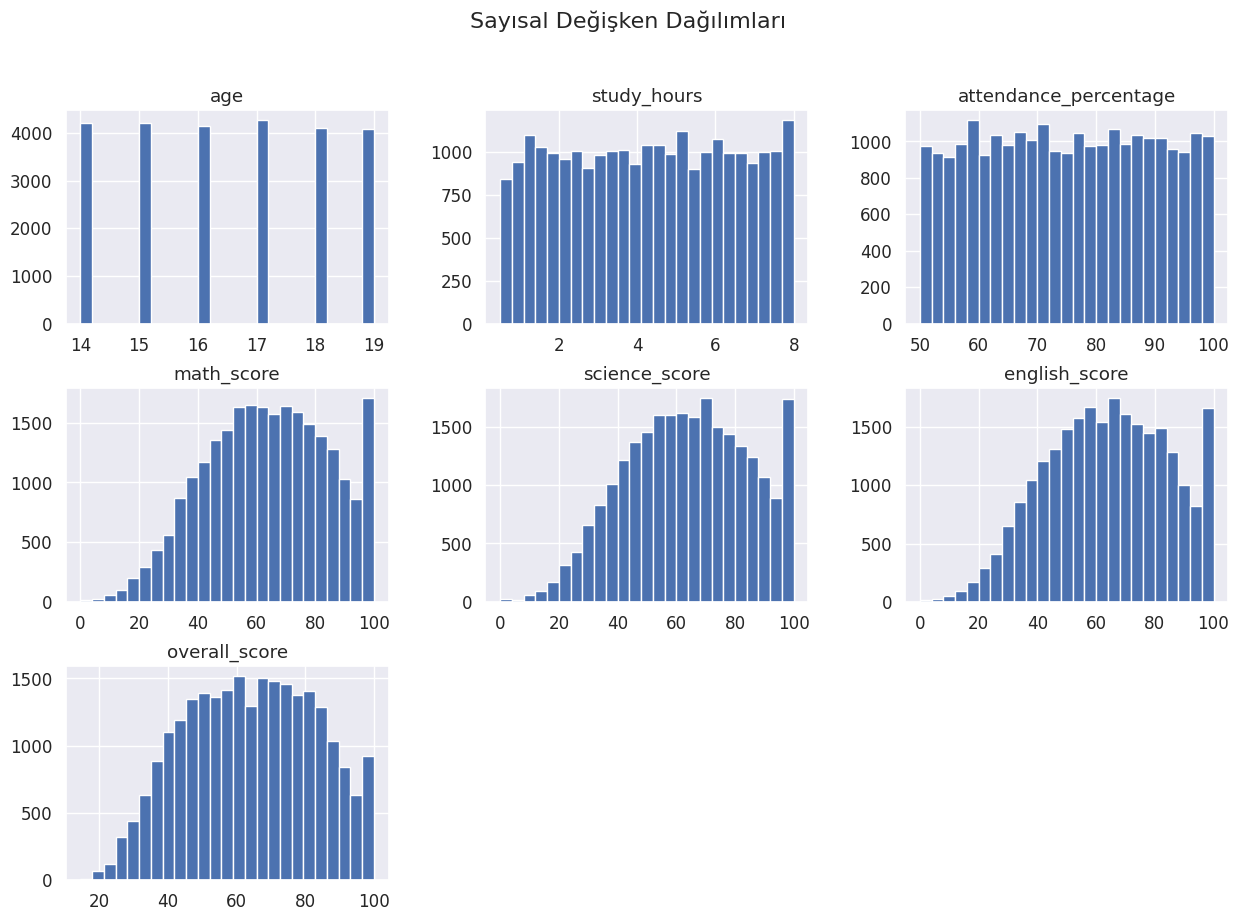

In [ ]:
numeric_cols = ["age", "study_hours", "attendance_percentage",
                "math_score", "science_score", "english_score", "overall_score"]

df[numeric_cols].hist(figsize=(15,10), bins=25)
plt.suptitle("Sayısal Değişken Dağılımları", fontsize=16)
plt.show()




- Tüm sayısal değişkenlerin histogramlarını çizerek dağılımlarını görmemizi sağlar.
- Skorların 0–100 arasında normal dağılıma yakın olduğunu göstermesi beklenir.
- Özellikle overall_score dağılımı regresyon için önemlidir.


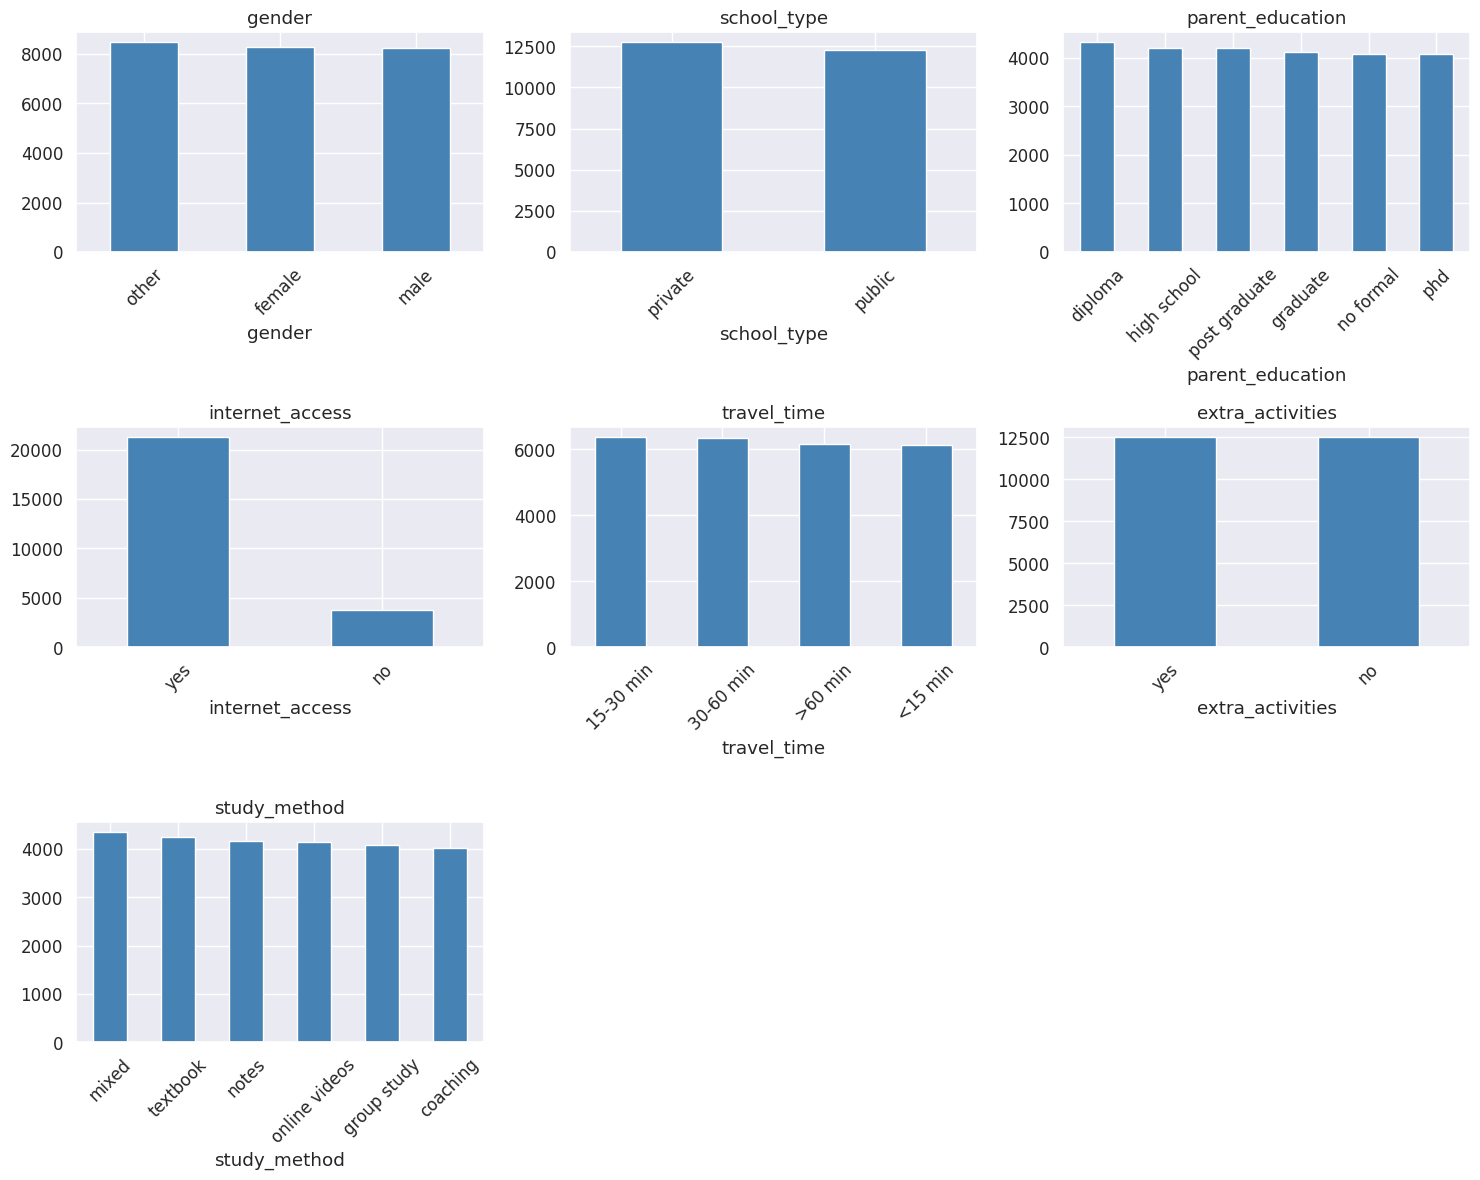

In [ ]:
categorical_cols = [
    "gender",
    "school_type",
    "parent_education",
    "internet_access",
    "travel_time",
    "extra_activities",
    "study_method"
]


plt.figure(figsize=(15,12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    df[col].value_counts().plot(kind="bar", color="steelblue")
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




- Kategorik sütunların her birinin kaç kez tekrar ettiğini gösterir.
- Sınıf dağılımını görerek veri dengesini analiz ederiz.
- One-Hot Encoding aşamasında hangi kategorilerin kullanılacağını anlamak için önemlidir.


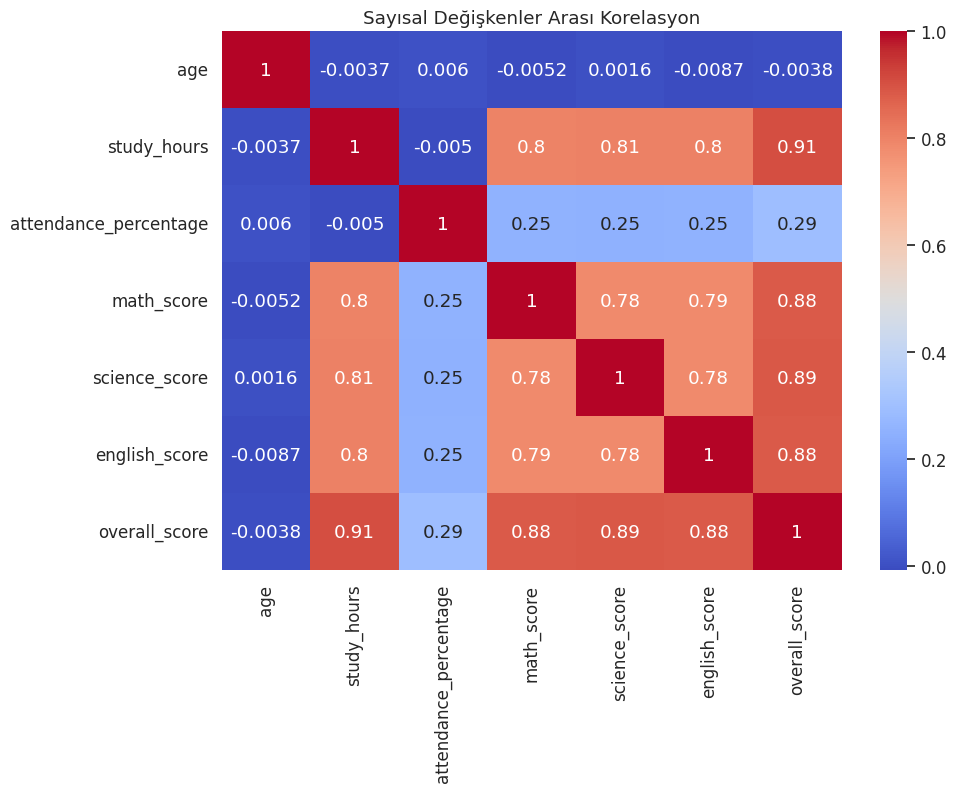

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Sayısal Değişkenler Arası Korelasyon")
plt.show()


### 📌 Bu hücre ne yapıyor?

- Sayısal değişkenlerin birbiriyle olan ilişkisini incelemek için korelasyon matrisi oluşturur.
- `overall_score` ile diğer değişkenlerin ne kadar ilişkili olduğunu görmemizi sağlar.
- Eğer çok yüksek korelasyon varsa model bu ilişkileri güçlü şekilde öğrenebilir.


In [ ]:
df_clean = df.drop(columns=[
    "student_id",
    "math_score",
    "science_score",
    "english_score",
    "final_grade"
])

df_clean.head()


,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,overall_score
0,14,male,public,post graduate,3.1,84.3,yes,<15 min,yes,notes,53.1
1,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,61.3
2,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,89.6
3,16,other,public,high school,1.1,58.1,no,15-30 min,no,notes,41.6
4,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,25.4




- Modelde kullanılmaması gereken sütunları çıkartıyoruz.
- `student_id` rastgele bir tanımlayıcıdır (hiçbir bilgi taşımaz).
- `math_score`, `science_score`, `english_score` ve `final_grade`
  doğrudan *overall_score* ile ilişkili olduğu için modele dahil edilmesi **data leakage** oluşturur.
- Geriye model için saf ve güvenilir açıklayıcı değişkenler kalır.


In [ ]:
numeric_cols = ["age", "study_hours", "attendance_percentage"]
categorical_cols = [
    "gender",
    "school_type",
    "parent_education",
    "internet_access",
    "travel_time",
    "extra_activities",
    "study_method"
]

df_clean[numeric_cols].head(), df_clean[categorical_cols].head()


(   age  study_hours  attendance_percentage
 0   14          3.1                   84.3
 1   18          3.7                   87.8
 2   17          7.9                   65.5
 3   16          1.1                   58.1
 4   16          1.3                   61.0,
    gender school_type parent_education internet_access travel_time  \
 0    male      public    post graduate             yes     <15 min   
 1  female      public         graduate             yes     >60 min   
 2  female     private    post graduate              no     <15 min   
 3   other      public      high school              no   15-30 min   
 4  female      public      high school             yes   30-60 min   
 
   extra_activities study_method  
 0              yes        notes  
 1               no     textbook  
 2               no        notes  
 3               no        notes  
 4              yes  group study  )



- Sayısal ve kategorik değişkenleri tanımlıyoruz.
- Bu ayrım, encoding ve scaling işlemleri için gereklidir.
- Artık model için tamamen güvenli ve leakage içermeyen değişkenler seçilmiş durumda.


In [ ]:
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)
df_encoded.head()


,age,study_hours,attendance_percentage,overall_score,gender_male,gender_other,school_type_public,parent_education_graduate,parent_education_high school,parent_education_no formal,...,internet_access_yes,travel_time_30-60 min,travel_time_<15 min,travel_time_>60 min,extra_activities_yes,study_method_group study,study_method_mixed,study_method_notes,study_method_online videos,study_method_textbook
0,14,3.1,84.3,53.1,True,False,True,False,False,False,...,True,False,True,False,True,False,False,True,False,False
1,18,3.7,87.8,61.3,False,False,True,True,False,False,...,True,False,False,True,False,False,False,False,False,True
2,17,7.9,65.5,89.6,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
3,16,1.1,58.1,41.6,False,True,True,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,16,1.3,61.0,25.4,False,False,True,False,True,False,...,True,True,False,False,True,True,False,False,False,False




- Kategorik değişkenleri 0/1 formatında yeni sütunlara dönüştürüyoruz.
- `drop_first=True` kullanarak dummy trap oluşmasını engelliyoruz.
- Artık tüm veriler sayısal formda olduğu için ML modelleri ile uyumlu.


In [ ]:
X = df_encoded.drop("overall_score", axis=1)
y = df_encoded["overall_score"]

X.shape, y.shape


((25000, 21), (25000,))



- `X` → modelin tahmin için kullanacağı tüm bağımsız değişkenler.
- `y` → tahmin edilecek hedef olan **overall_score**.
- Artık modellemeye hazır veri setimiz oluştu.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

X_train.shape, X_test.shape


((20000, 21), (5000, 21))



- Veriyi %80 eğitim, %20 test olarak ikiye ayırıyoruz.
- `random_state=42` kullanarak bölünmenin tekrarlanabilir olmasını sağlıyoruz.
- Eğitim verisi modeli öğretmek, test verisi ise modeli objektif şekilde değerlendirmek için kullanılır.


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]


array([[-1.46020841,  1.12709585, -1.11412593,  1.42569297, -0.71270924,
         1.0197959 , -0.44686472, -0.44823286, -0.44259028, -0.4387878 ,
         2.23539739,  0.42205904, -0.58273899,  1.75048981, -0.57288536,
        -0.99371972, -0.44412423, -0.45912998, -0.44396285,  2.23862049,
        -0.45224886],
       [ 1.47700929, -1.45644678, -1.3302302 , -0.70141329, -0.71270924,
        -0.98058837, -0.44686472,  2.23098326, -0.44259028, -0.4387878 ,
        -0.44734775,  0.42205904, -0.58273899, -0.57126868,  1.74554993,
         1.00631997, -0.44412423, -0.45912998, -0.44396285, -0.44670367,
        -0.45224886],
       [-1.46020841,  0.25053674,  1.02600349,  1.42569297, -0.71270924,
        -0.98058837, -0.44686472, -0.44823286, -0.44259028, -0.4387878 ,
         2.23539739, -2.36933675, -0.58273899,  1.75048981, -0.57288536,
        -0.99371972, -0.44412423, -0.45912998, -0.44396285,  2.23862049,
        -0.45224886],
       [ 1.47700929,  0.20440205,  1.19331002,  1.42569297



- StandardScaler ile tüm sayısal özellikleri aynı ölçeğe getiriyoruz.
- Bu işlem özellikle KNN ve Linear Regression için kritik öneme sahiptir.
- Ortalaması 0, standart sapması 1 olan bir veri dağılımı elde edilir.


In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

lr_pred = lr.predict(X_test_scaled)

lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

lr_mae, lr_rmse, lr_r2


(5.008118844019907, np.float64(5.778342944116459), 0.9080366509382957)



- Lineer regresyon modeli eğitiliyor.
- Test verisinde tahmin yapılarak MAE, RMSE ve R² skorları hesaplanıyor.
- Bu model *baseline* olarak kullanılır ve diğer modellerin karşılaştırma noktasıdır.


In [ ]:
rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

rf_mae, rf_rmse, rf_r2


(3.327382133333331, np.float64(4.52229466367094), 0.9436718010928435)



- 300 ağaçtan oluşan bir Random Forest modeli eğitiliyor.
- Karmaşık, doğrusal olmayan ilişkileri iyi öğrenen güçlü bir modeldir.
- Genellikle regresyon problemlerinde çok yüksek performans verir.


In [ ]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train_scaled, y_train)

knn_pred = knn.predict(X_test_scaled)

knn_mae = mean_absolute_error(y_test, knn_pred)
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_pred))
knn_r2 = r2_score(y_test, knn_pred)

knn_mae, knn_rmse, knn_r2


(8.98533142857143, np.float64(11.161161123855038), 0.6568951106474293)



- KNN modeli ile tahmin yapıyoruz.
- Bu model veriye komşuluk mantığıyla yaklaşır ve scaling gerektirir.
- Karşılaştırma amaçlı olarak model setine dahil edilmiştir.


In [ ]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest",  "KNN"],
    "MAE": [lr_mae, rf_mae, knn_mae],
    "RMSE": [lr_rmse, rf_rmse,  knn_rmse],
    "R2 Score": [lr_r2, rf_r2,  knn_r2]
})

results


,Model,MAE,RMSE,R2 Score
0,Linear Regression,5.008119,5.778343,0.908037
1,Random Forest,3.327382,4.522295,0.943672
2,KNN,8.985331,11.161161,0.656895




- Tüm modellerin performans metriklerini tek bir tabloya toplar.
- En yüksek R², en düşük MAE ve RMSE değerine sahip model genelde en iyi modeldir.
- Bu tablo, final proje raporu için ana sonuç tablosu olacaktır.


Yapılan model karşılaştırmalarında, Random Forest Regressor modeli
tüm metriklerde en yüksek performansı göstermiştir (MAE = 3.32, RMSE = 4.52, R² = 0.943).

Bu sonuçlar, Random Forest’ın lineer olmayan ilişkileri başarılı bir şekilde modellediğini,
özellikle demografik ve eğitimsel faktörlerin overall_score üzerindeki etkisini
çok iyi yakaladığını göstermektedir.

Linear Regression modeli güçlü bir baseline sunmuş (R² = 0.908),
KNN modeli ise bu veri seti için uygun bir yaklaşım olmadığını göstermiştir.

Bu nedenle proje için **nihai model olarak Random Forest Regressor seçilmiştir.**


# SONUÇLAR VE GENEL DEĞERLENDİRME

Bu projede, 25.000 öğrencinin çeşitli demografik, akademik ve sosyal özelliklerini içeren **Student Performance** veri seti kullanılarak öğrencilerin **overall_score** başarı puanları tahmin edilmiştir.

Bu çalışma kapsamında:

- Veri yükleme ve keşifsel veri analizi (EDA)
- Uygun özellik seçimi ve veri ön işleme
- Kategorik değişkenler için One-Hot Encoding
- Sayısal değişkenlerin ölçeklendirilmesi
- Farklı regresyon modellerinin eğitilmesi ve karşılaştırılması

adımları gerçekleştirilmiştir.

---

##  Feature Selection ve Veri Hazırlığı

Modelde *data leakage* oluşmaması için overall_score’u doğrudan belirleyen:

- `math_score`
- `science_score`
- `english_score`
- `final_grade`

ve ayrıca anlamsal bilgi taşımayan `student_id` değişkeni veri setinden çıkarılmıştır.

Kullanılan bağımsız değişkenler:

**Sayısal değişkenler**
- `age`
- `study_hours`
- `attendance_percentage`

**Kategorik değişkenler**
- `gender`
- `school_type`
- `parent_education`
- `internet_access`
- `travel_time`
- `extra_activities`
- `study_method`

Bu değişkenler eğitim performansını etkileyen anlamlı faktörler olduğu için modele dahil edilmiştir.

---

##  Model Performanslarının Karşılaştırılması

Aşağıdaki regresyon modelleri eğitilmiş ve karşılaştırılmıştır:

- Linear Regression  
- Random Forest Regressor  
- KNN Regressor  

Değerlendirme metrikleri MAE, RMSE ve R² skorlarıdır.

| Model             | MAE   | RMSE  | R² Score |
|-------------------|-------|-------|----------|
| Linear Regression | 5.00  | 5.77  | 0.908    |
| Random Forest     | 3.33  | 4.52  | 0.944    |
| KNN               | 8.99  | 11.16 | 0.657    |

---

##  En Başarılı Model: Random Forest Regressor

Sonuçlar, **Random Forest Regressor** modelinin tüm metriklerde en iyi performansı gösterdiğini ortaya koymuştur:

- En düşük MAE (≈ 3.3)
- En düşük RMSE (≈ 4.5)
- En yüksek R² (≈ 0.94)

Bu modelin başarısı:

- Doğrusal olmayan ilişkileri iyi yakalaması,
- Kategorik ve sayısal değişkenleri etkili şekilde işleyebilmesi,
- Ensemble yapısı sayesinde yüksek genelleme kabiliyeti

gibi sebeplerle açıklanabilir.

Linear Regression güçlü bir baseline performans sunarken, KNN modeli bu veri setinde görece daha düşük performans göstermiştir.

---

##  Genel Çıkarımlar

- Öğrenci başarısının `study_hours`, `attendance_percentage`, `parent_education` ve `study_method` gibi değişkenlerden etkilendiği gözlemlenmiştir.
- Veri ön işleme adımı (özellikle leakage engelleme ve encoding) model performansına önemli katkı sağlamıştır.
- Ensemble modelleri (özellikle Random Forest), öğrenci başarı tahmininde güçlü performans göstermektedir.
- Elde edilen R² değerleri (~0.94), bağımsız değişkenlerin overall_score üzerinde yüksek açıklayıcılığa sahip olduğunu göstermektedir.

---

## Sonuç

Bu çalışma sonucunda **Random Forest Regressor**, overall_score tahmini için en iyi performansı göstermiş ve proje için nihai model olarak seçilmiştir.

Bu yaklaşım, gelecekte öğrenci başarılarını etkileyen faktörlerin daha detaylı incelenmesi ve eğitim stratejilerinin geliştirilmesi için temel bir referans oluşturabilir.
